In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = pd.read_csv("CYBERBULLYING.csv", delimiter=";", encoding="ISO-8859-1")
data

,No.,Nama Instagram,Komentar,Kategori,Tanggal Posting,Nama Akun IG Artis/Selebgram,Unnamed: 6,Unnamed: 7
0,1,@delliananda,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
1,2,@fenninbl,"""makan nasi padang aja begini badannya""",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
2,3,@abdurahmanshq,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
3,4,@najla.yoo,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
4,5,@dessy_______,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,14 Oktober 2019,@isyanasarasvati,NaN,NaN
...,...,...,...,...,...,...,...,...
645,646,@_sigesrek,"""aku memutuskan untuk menjadi fans isyana. gil...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
646,647,@safronlux.id,"""AMZING ISYANAA!! Jujur aku amazed banget deng...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
647,648,@rikzikmuktyana,"""paling ngiri liat orang keren maen alat musik...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN
648,649,@antoniusbennys,"""Sampe ga bisa berkata2 lagi buat isyana, sang...",Non-bullying,13 Februari 2021,@isyanasarasvati,NaN,NaN


In [2]:
print(data.columns)


Index(['No.', 'Nama Instagram', 'Komentar', 'Kategori', 'Tanggal Posting',
       'Nama Akun IG  Artis/Selebgram', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')


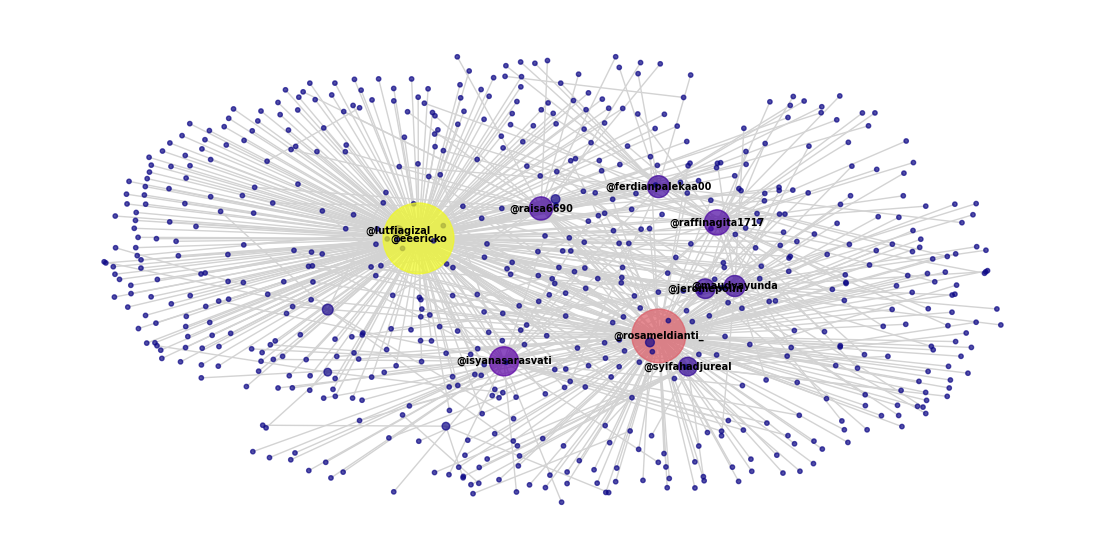

In [3]:
# Membuat objek grafik (graph)
G = nx.Graph()

# Menambahkan node berdasarkan kolom "Nama Akun IG Artis/Selebgram"
for index, row in data.iterrows():
    account_name = row["Nama Akun IG  Artis/Selebgram"]
    instagram_name = row["Nama Instagram"]
    G.add_node(account_name)
    G.add_edge(account_name, instagram_name)  # Menambahkan edge (konektivitas) antara node

# Menghitung derajat setiap node dalam grafik
degree = dict(G.degree())

# Mengatur warna node berdasarkan jumlah derajat
node_color = list(degree.values())

# Menambahkan kolom 'Degree' ke dataframe
data['Degree'] = data["Nama Akun IG  Artis/Selebgram"].map(degree)

# Menentukan ukuran node berdasarkan derajatnya
node_size = [v * 10 for v in node_color]

# Membuat objek figure dengan ukuran canvas yang diinginkan
plt.figure(figsize=(14, 7))

# Menggambar network graph dengan menyesuaikan node lebih baik
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Hanya beri label pada 10 node teratas
top_10_nodes = sorted(degree, key=degree.get, reverse=True)[:10]
labels = {node: node for node in top_10_nodes}

# Gambar node dengan ukuran dan warna yang sesuai
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.plasma, alpha=0.7)

# Gambar edge
nx.draw_networkx_edges(G, pos, width=1, edge_color="lightgray")

# Gambar label
nx.draw_networkx_labels(G, pos, labels, font_size=7, font_color='black', font_weight='bold')

plt.axis('off')
plt.show()

In [4]:
# Membuat objek grafik (graph)
G = nx.Graph()

# Menambahkan node berdasarkan kolom "Nama Akun IG Artis/Selebgram" dan "Nama Instagram"
for _, row in data.iterrows():
    account_name = row["Nama Akun IG  Artis/Selebgram"]
    instagram_name = row["Nama Instagram"]
    G.add_node(account_name)
    G.add_node(instagram_name)
    G.add_edge(account_name, instagram_name)

# Menghitung degree centrality untuk setiap "Nama Akun IG Artis/Selebgram"
degree_centrality = nx.degree_centrality(G)

sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Menampilkan degree centrality yang sudah diurutkan
for account_name, centrality in sorted_centrality:
    if account_name in data["Nama Akun IG  Artis/Selebgram"].values:
        print(f"Nama Akun IG Artis/Selebgram: {account_name}, Degree Centrality: {centrality}")

Nama Akun IG Artis/Selebgram: @eeericko, Degree Centrality: 0.40061633281972264
Nama Akun IG Artis/Selebgram: @rosameldianti_, Degree Centrality: 0.23112480739599384
Nama Akun IG Artis/Selebgram: @isyanasarasvati, Degree Centrality: 0.06779661016949153
Nama Akun IG Artis/Selebgram: @raffinagita1717, Degree Centrality: 0.05084745762711865
Nama Akun IG Artis/Selebgram: @raisa6690, Degree Centrality: 0.04314329738058552
Nama Akun IG Artis/Selebgram: @ferdianpalekaa00, Degree Centrality: 0.038520801232665644
Nama Akun IG Artis/Selebgram: @maudyayunda, Degree Centrality: 0.03543913713405239
Nama Akun IG Artis/Selebgram: @jeromepolin, Degree Centrality: 0.030816640986132512
Nama Akun IG Artis/Selebgram: @syifahadjureal, Degree Centrality: 0.02773497688751926
Nama Akun IG Artis/Selebgram: @lutfiagizal, Degree Centrality: 0.009244992295839754
Nama Akun IG Artis/Selebgram: @gagamuhammad, Degree Centrality: 0.009244992295839754
Nama Akun IG Artis/Selebgram: @kalinaocktarany, Degree Centrality: 0